# **INTRODUCTION**
In India, increased urbanisation, industrial activity, and increasing car emissions all contribute to dangerous air quality levels, making air pollution a serious public health concern.Understanding how various pollutants affect overall air quality in Indian cities is crucial since high concentrations of toxic gases and particulate matter are associated with major health problems. An air-quality dataset collected from different monitoring sites in several Indian cities is analysed in this study. The goal is to determine which pollutants are most responsible for poor air quality and to offer information that improves with efficient environmental monitoring. This project will be employing a comprehensive data-analysis methodology that includes data cleaning, exploratory data analysis (EDA), and a basic predictive model in order to accomplish this. GitHub is used for version control, and visualisations and an interactive Streamlit application are used to convey the results.



# **Importing the required libraries**

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# **Mounting the drive**

In [9]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
drive_path = '/content/drive/MyDrive/GOOGLE COLAB PROJECTS/PROGRAMMING FOR DATA ANALYSIS ASSIGNMENT/Assessment Data-20251105'

# **Combining all the csv files in the assessment data folder in the drive path**

In order to analyse the pollutants consistently across all locations and time periods, the dataset, which is divided into several CSV files, must be integrated into a single dataframe. Complete and accurate data cleaning, exploration, and modelling are made possible by merging the files.




In [12]:
import os
import pandas as pd

dataframes = []

for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(drive_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

full_df = pd.concat(dataframes, ignore_index=True)

# **Investigating the Combined Dataset**

I will now look at the first and last rows, verify the data types, then use head(), tail(), info(), and describe() to study summary statistics in order to comprehend the structure and contents of the combined dataset.

In [13]:
full_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Talcher,20/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,3.60,NaN,0.02,NaN,NaN,NaN,NaN,NaN
1,Talcher,21/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,3.41,NaN,0.03,NaN,NaN,NaN,NaN,NaN
2,Talcher,22/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,5.15,NaN,0.02,NaN,NaN,NaN,NaN,NaN
3,Talcher,23/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talcher,24/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
full_df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Mumbai,27/06/2020,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,5.68,0.82,NaN,NaN,64.0,Satisfactory
29527,Mumbai,28/06/2020,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,5.76,0.85,NaN,NaN,64.0,Satisfactory
29528,Mumbai,29/06/2020,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,5.84,0.47,NaN,NaN,54.0,Satisfactory
29529,Mumbai,30/06/2020,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,6.94,0.73,NaN,NaN,54.0,Satisfactory
29530,Mumbai,01/07/2020,3.84,11.28,27.64,5.57,33.21,23.60,0.37,13.18,6.68,0.78,NaN,NaN,53.0,Satisfactory


In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [16]:
full_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# **Data understanding/Data Overview**

In this dataset here are 29,531 rows and 16 columns of the combined dataset. It represents the hourly air-quality measurements taken in a number of Indian cities. There are thirteen numerical pollutant variables (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, and AQI) and three categorical features (City, Date, and AQI_Bucket) are included in this combined dataset. Additionally, a number of pollutant columns in the info() output have missing values, which will have to be rectified during preprocessing. This dataset supports the project's objective of identifying the pollutants that contribute to poor air quality by offering a comprehensive perspective of pollutant concentrations and air-quality conditions.

# **Data preprocessing:**

**Handling missing data**

In [17]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })

    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(full_df)
display(missing_values.style.background_gradient(cmap='Greens'))


,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


**Missing value summary:**

I started by looking at the quantity and percentage of missing values in each column to determine the dataset's quality. This makes it easier to determine which features could require cleaning or removal and which pollutant measures are lacking. The findings demonstrate that while some pollutants, like CO and NO, have comparatively few missing values, others, like Xylene, PM10, and NH3, have substantial amounts of missing data. On the other hand, there are no missing values in the City and Date columns, which indicates that the time and location data are complete, however it is not necessary because it is not essential to my research question.

**Identifying Pollutant Columns for Analysis:**

Since my research question aims to identify which pollutant most strongly contributes to poor air quality, I began by identifying all numerical pollutant variables in the dataset. These selected columns represent measured concentrations of various air contaminants across Indian cities and will be used throughout the cleaning, exploratory analysis, and modelling stages.

In [18]:
full_df.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [19]:
pollutant_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
    'Xylene', 'AQI'
]


# **Removing duplicate entries**

I started by looking for duplicate entries to make sure the dataset was clean and credible. By increasing pollution levels deliberately, duplicate pollutant measurements might distort the results of my research. Accuracy is crucial since my study topic seeks to determine which pollutant is most responsible for poor air quality. I first checked how many duplicates existed in the dataset which was 0 which indicates that no rows were repeated. I used drop_duplicates() as a precaution to make sure the dataset stayed clean even if there were no duplicates. After cleaning, the final check verified that there were no duplicates left. This guarantees that every pollutant measurement makes a fair and accurate contribution to the research.

**Checking for duplicates:**


In [20]:
# Step 1: Check how many duplicate rows exist
print(f"There are {full_df.duplicated().sum()} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


**Removing duplicates:**

In [21]:
# Step 2: Remove duplicate rows
full_df = full_df.drop_duplicates()

print("Duplicates removed.")

Duplicates removed.


**Final check of removal:**

In [22]:
print(f"Duplicates left after cleaning: {full_df.duplicated().sum()}")

Duplicates left after cleaning: 0


# **Feature engineering**
In order to make the analysis more understandable and informative, feature engineering entails preparing and enhancing the dataset by adding or changing variables. The feature engineering procedures are straightforward and directly applicable because my research issue focusses on determining which pollutant is most responsible for bad air quality.

The main tasks include:

1. Making the date column in the corerct datatime format

Even though my study is concentrated on pollutants, this enables me to extract relevant time-based information later (e.g., month, year).

In [23]:
full_df['Date'] = pd.to_datetime(full_df['Date'], errors='coerce')

/tmp/ipython-input-3659896378.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  full_df['Date'] = pd.to_datetime(full_df['Date'], errors='coerce')


2. Extracting the month and year

Adding a month column aids in understanding pollutant fluctuation over time, even though seasonality is not my primary study objective.

In [24]:
full_df['Month'] = full_df['Date'].dt.month

3. Choosing the relevant pollutants

I previously made a list in my notebook named pollutant_cols that included every numerical pollutant variable significant to my research issue. I will now utilise this previously created list to extract only the pollutant-related features from the dataset because my goal is to determine which pollutant contributes most to bad air quality. By concentrating on the behaviour of pollutants, this stage produces a cleaner subset of the data. The remaining cleaning, modelling, and visualisation procedures will be performed using this subset (pollutant_df). However, I made an separate version of the pollutant dataset using.copy(). This just keeps the original dataset (full_df) from being accidentally altered when cleaning or altering pollutant_df.

In [25]:
pollutant_df = full_df[pollutant_cols].copy()

# **Exploratory data analysis (EDA) Visulisations:**

**Each Pollutant's Distribution - Univariate Analysis**

Univariate analysis is a simple statistical technique used to examine one variable at a time. It helps understand the distribution, central tendency, and spread of a single pollutant (or any variable). This type of analysis will make it easier for me to fully understand how each pollutant is distributed throughout the dataset. It also shows the frequency of high pollution levels.

<Figure size 1500x1200 with 0 Axes>

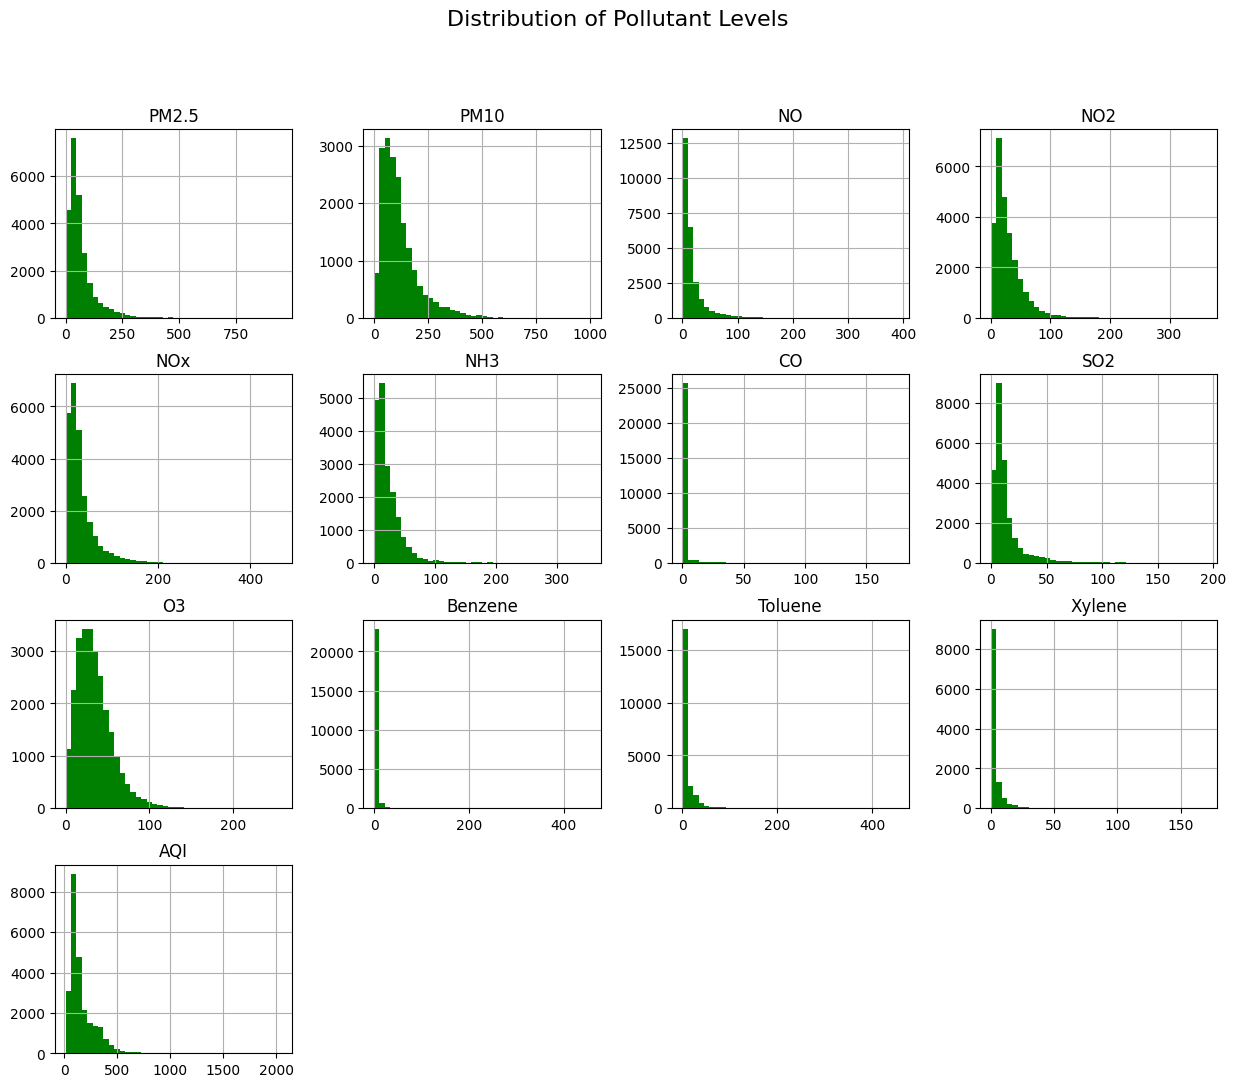

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
pollutant_df.hist(bins=40, figsize=(15, 12), color='green')
plt.suptitle("Distribution of Pollutant Levels", fontsize=16)
plt.show()


**Histogram Analysis**

The distribution of certain pollutant concentrations across all dataset observations is shown in the histograms above. A single pollutant is represented by each histogram, which displays the frequency of various concentration values.The majority of measurements are concentrated at lower levels, with a limited number of extremely high values, due to the fact that most contaminants are right-skewed. Wide ranges and extended right tails for PM2.5 and PM10 indicate infrequent high pollution occurrences. Strong right skewness is also seen in gaseous pollutants like NO, NO2, NOx, and SO2, indicating that high concentrations are less common but could have a major effect on air quality. With a few high outliers, volatile organic compounds (benzene, toluene, and xylene) have extremely abrupt peaks at low levels.The AQI has a similar skewed pattern, with fewer cases indicating severe air quality conditions and the majority of observations falling between lower to moderate categories. While the majority of pollutant concentrations are comparatively low, these distributions show that some contaminants have extreme values, which may be a major contributor to poor air quality. In line with my study question, which pollutants are mostly to blame for poor air quality, this finding encourages more analysis to identify which pollutant most significantly contributes to high AQI values.

**Exploring Pollutant Impact on Air Quality (AQI) — Multivariate Analysis**

The statistical and visual methods used to investigate the correlations between several variables at once are referred to as multivariate analysis. Compared to univariate or bivariate analysis, it enables us to observe how several pollutants interact with the AQI variable and with one another, providing deeper insights. Multivariate analysis is used in this study to identify which pollutants are most strongly associated with poor air quality. This method supports the study question and helps identify important contributors to AQI variance by simultaneously evaluating many pollutant properties.

***1.1 Analysis of Correlation***

I constructed a correlation matrix to investigate the overall relationship between pollutants and air quality.
The degree to which each pollutant moves in the same direction as the AQI is measured by this multivariate approach.

- Pollutant levels rise as AQI rises, indicating poor air quality; values near +1 indicate a significant positive connection.

- Values near zero indicate little or no correlation.

- A significant negative connection, or movement in opposing directions, is indicated by values near -1.

This helps determine which pollutants are more closely linked to high AQI values and, hence, may contribute more to poor air quality, which is helpful for my research issue.

Correlation of each pollutant with AQI:
AQI        1.000000
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Xylene     0.165532
Benzene    0.044407
Name: AQI, dtype: float64


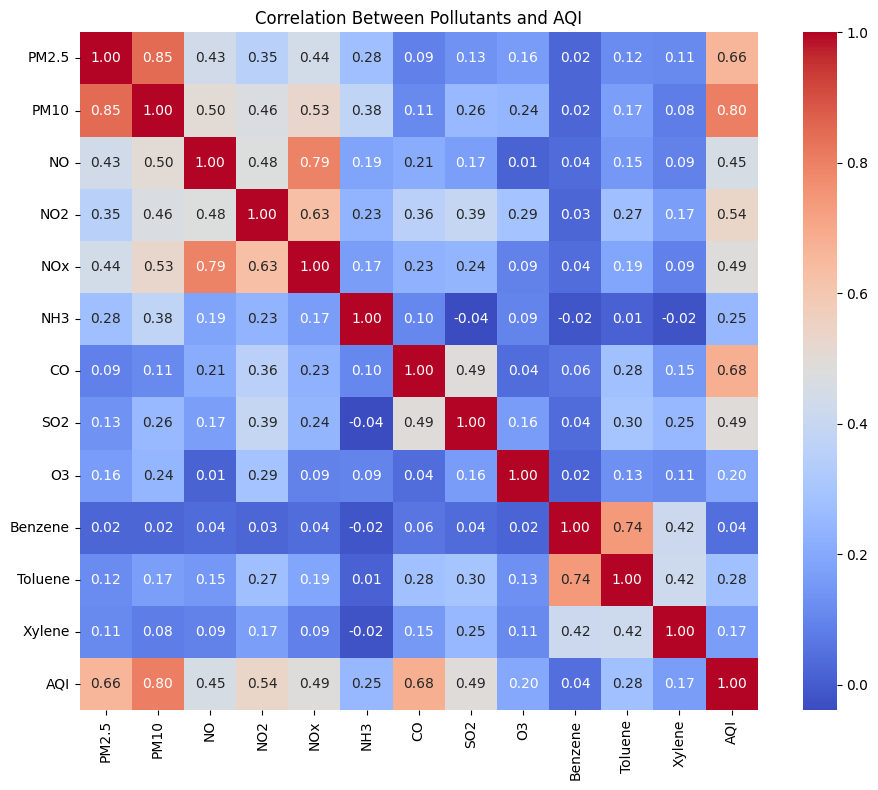

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pollutant_df.corr(numeric_only=True)

aqi_corr = corr_matrix['AQI'].sort_values(ascending=False)
print("Correlation of each pollutant with AQI:")
print(aqi_corr)


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Between Pollutants and AQI")
plt.tight_layout()
plt.show()


**Results of the Heatmap Correlation Analysis**

The correlation values indicate the degree to which each pollutant and AQI are related (higher AQI = poorer air quality). AQI tends to deteriorate as pollution levels rise because all relationships are positive. The top four pouultants that cotrivute to poorer air quality is PM10, CO, PM2.5 AND NO2. PM10 i strongest cotributor which a correlation score of 0.80 and is the primary driver of poor air quality. CO follows closely behind with a correlation score of 0.68, this is linked likely to fuel or traffic combustion. PM2.5 has a correlation score of 0.66 and is also a major factor in air pollution and health risk, and then, lastly, NO2 has a significant role in traffic emissions, which is evident in its correlation score of 0.54. These pollutaants are the strongest indicators of detrotiating air quality.

However, the rest of pollutants like SO2, NOX, NO, Toluene, NH3, O3, Xylene and Benzene show that they have modertate to low links to AQI score in this dataset but  also have a noticeable but weaker effect to the other pollutants.

***1.2 Scatter plot Analysis***

Scatter plots were created to show how each pollutant acts in relation to the Air Quality Index (AQI) in order to visually validate the correlation findings. These plots assist in determining the degree to which an increase in a pollutant is associated with deteriorating air quality. An increasing trend in a plot indicates that greater pollutant readings are linked to higher AQI levels, or worse air quality. The correlation matrix's statistical data is reinforced by this visual confirmation.


In [28]:
pollutant_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
]


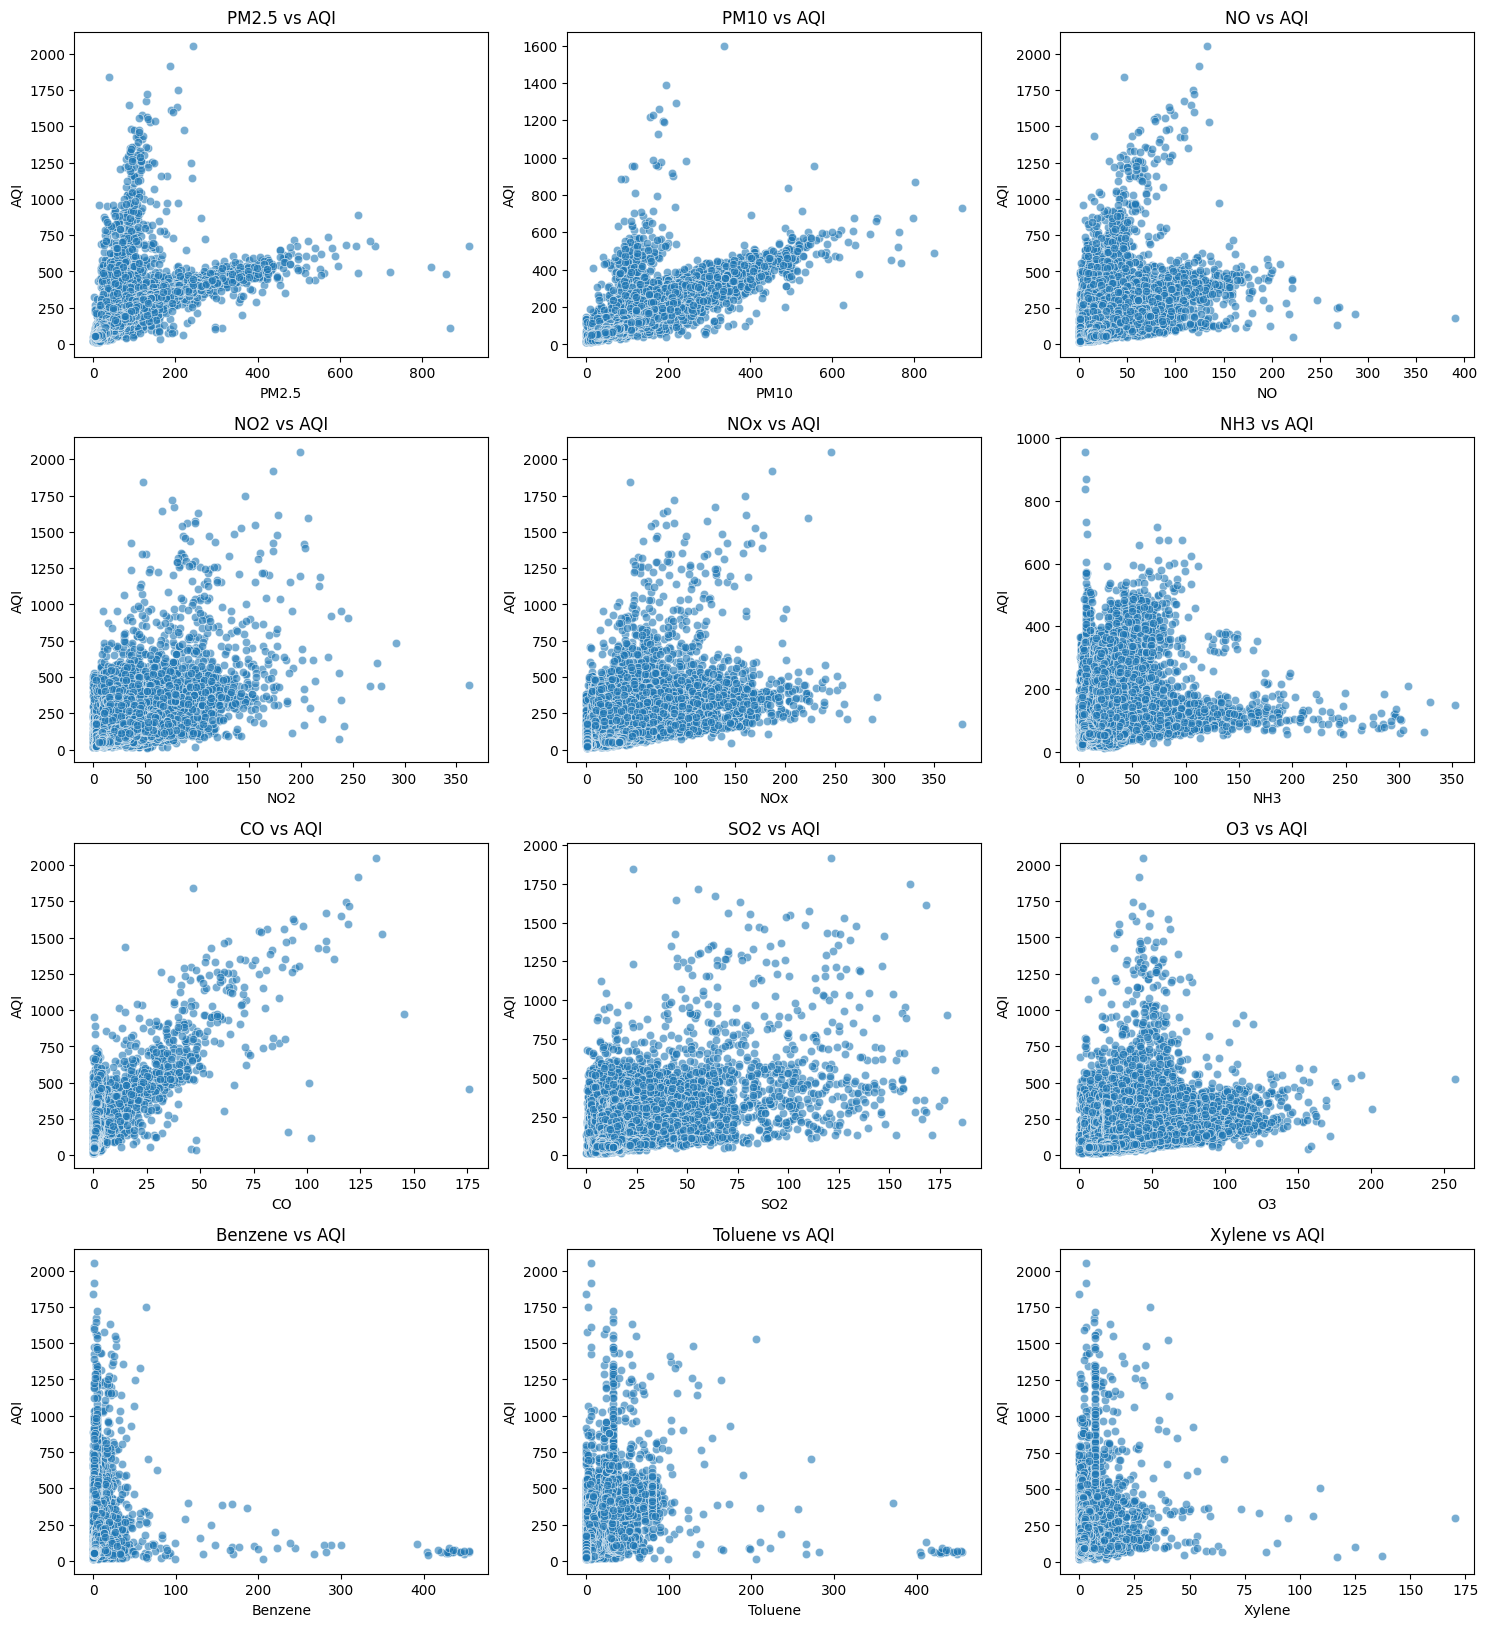

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

for i, col in enumerate(pollutant_cols):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=pollutant_df, x=col, y='AQI', alpha=0.6)
    plt.title(f'{col} vs AQI')
    plt.xlabel(col)
    plt.ylabel('AQI')

plt.tight_layout()
plt.show()


**Results of the Heatmap Correlation Analysis**

To investigate the relationship between every pollutant and AQI, scatter plots were made. Several figures show a general upward trend, particularly for PM2.5, PM10, NO2, and CO. This indicates that lower air quality is typically associated with higher pollutant concentrations and higher AQI levels. Certain pollutants exhibit a stronger correlation with changes in air quality than others. This visual proof helps determine which pollutants might have the biggest effects on AQI, which supports my research goal.

***1.3 Bar chart of pollutant–AQI correlation***

In [30]:
aqi_corr = pollutant_df.corr()['AQI'].drop('AQI')


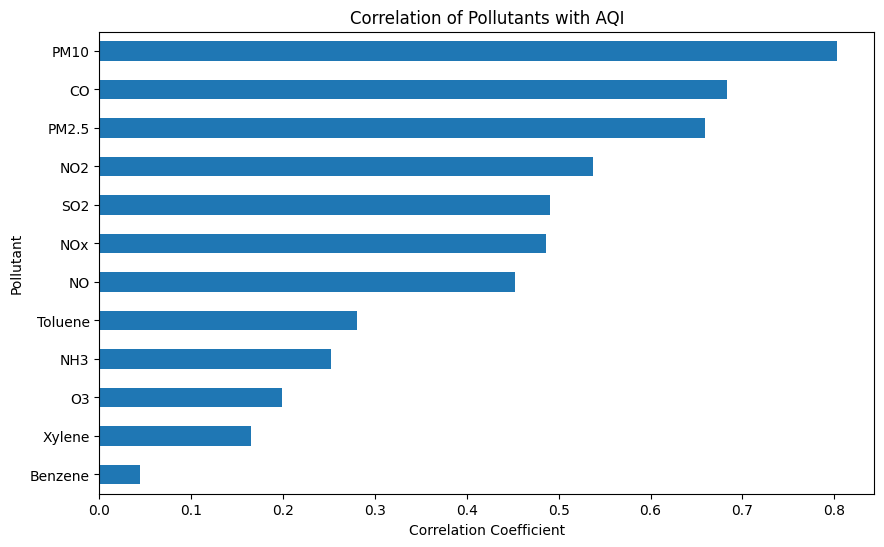

In [31]:
plt.figure(figsize=(10, 6))
aqi_corr.sort_values().plot(kind='barh')
plt.title('Correlation of Pollutants with AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Pollutant')
plt.show()


**Bar chart correlation analysis**

The correlation bar chart demonstrates the degree to which each pollutant is linked to variations in the Air Quality Index (AQI), a measure of the general quality of the air. According to the findings, PM10 has the largest positive connection with AQI, suggesting that higher PM10 concentrations are most strongly associated with poorer air quality. Following this CO and PM2.5, which likewise exhibit substantial positive correlations with AQI, indicating that these pollutants are important contributors to deteriorating air quality. NO2, SO2, NOX, and NO show moderate associations, suggesting that they contribute to the deterioration of air quality, albeit to a smaller degree. O₃, NH₃, Xylene, and Benzene, on the other hand, have weak correlations, indicating a less significant direct impact on AQI in this sample. To conclude, this analysis of the bar chart supports my research question by showing that CO PM10 and PM2.5 are the pollutants most strongly linked to poor air quality, making them important factors in the decline of the AQI.

# **Streamlit for application development**

In [32]:
!pip install streamlit

In [33]:
!pip install --upgrade Streamlit

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Air Quality Dashboard", layout="wide")

st.title("Air Quality Analysis Dashboard")
st.write(
    "This dashboard explores air quality data from Indian cities to identify which pollutants "
    "contribute most to poor air quality (AQI)."
)

# ----------------------------
# Load data
# ----------------------------
@st.cache_data
def load_data():
    return pd.read_csv("full_df.csv")

df = load_data()

st.subheader("Dataset Preview")
st.dataframe(df.head())

# ----------------------------
# Pollutant columns
# ----------------------------
pollutant_cols = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
]

pollutant_cols = [c for c in pollutant_cols if c in df.columns]

# ----------------------------
# Sidebar filters
# ----------------------------
st.sidebar.header("Filters")

if "City" in df.columns:
    cities = sorted(df["City"].dropna().unique())
    selected_city = st.sidebar.selectbox("Select City", ["All"] + list(cities))
    if selected_city != "All":
        df = df[df["City"] == selected_city]

selected_pollutant = st.sidebar.selectbox("Select Pollutant", pollutant_cols)

# Remove missing values for clean plots
df = df.dropna(subset=[selected_pollutant, "AQI"])

# ----------------------------
# Scatter plot
# ----------------------------
st.subheader(f"{selected_pollutant} vs AQI")

fig, ax = plt.subplots()
sns.scatterplot(data=df, x=selected_pollutant, y="AQI", alpha=0.5, ax=ax)
ax.set_xlabel(selected_pollutant)
ax.set_ylabel("AQI")
st.pyplot(fig)

# ----------------------------
# Correlation summary
# ----------------------------
st.subheader("Correlation Summary")
corr_value = df[[selected_pollutant, "AQI"]].corr().iloc[0, 1]
st.write(f"**Correlation between {selected_pollutant} and AQI:** {corr_value:.2f}")


Overwriting app.py


In [37]:
full_df.to_csv("full_df.csv", index=False)


In [38]:
!ls


app.py	drive  full_df.csv  sample_data


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.143.178:8501

your url is: https://fair-ends-draw.loca.lt


In [42]:
!wget -q -O - ipv4.icanhazip.com


35.240.143.178
